Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 04 - Free vibration in time domain

[1.   Free vibration of undamped _sdof_ systems](#section_1)  
[2.   Energy dissipation](#section_2)  
[3.   Free vibration of damped _sdof_ systems](#section_3)  
[4.   Damping ratio estimation](#section_4)  
[5.   Assignment](#section_5)  

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
from   MRPy import MRPy


## 1. Free vibration of undamped _sdof_ systems <a name="section_1"></a> 

The figure below shows an idealization of a single degree of freedom (sdof) mechanical system
with its basic elements:

1. The total system mass, $m$,
2. A restitutive force element, ideally a linear spring with stiffness coefficient $k$,
3. A dissipative force element, ideally a viscous damper with damping coefficient $c$,
4. The applied external force, $F(t)$, and
5. The system response, the displacement $u(t)$.

<img src="images/singleDOF.png" alt="SDOF system" width="240px"/>

Although the idealization presented above may resemble some feasible device, the 
basic elements may also be seen as conceptual and represent a much broader concept. 
For instance, the restitutive force element could be the gravity acting upon a pendulum.
Or the system response could also be a rotation angle instead of a displacement.

The dissipative force will be introduced in the next section and are initially
disregarded. If we also disregard the external force, $F(t) = 0$, any system response 
will be called _free vibration_ and that is our first case for analysis.

By applying the equilibrium equation and accounting for the inertial force as stated
by Newton's law gives:

$$ m \ddot{u} + k u = 0 $$

Applying Laplace transform over this equation gives:

$$ \mathscr{L}\left\{ m \ddot{u} + k u \right\} = 
    m \left[ -s u(0) - \dot{u}(0) + s^2 \bar{u}(s) \right] + k \bar{u}(s) = 0 $$

Recognizing that $u(0) = u_0$ is the system initial position and $\dot{u}(0) = v_0$
is the system initial velocity and solving for $\bar{u}(s)$ gives:

$$ \bar{u}(s) =  \left(\frac{s}{s^2 + \omega_{\rm n}^2}\right) u_0 + 
   \left(\frac{\omega_{\rm n}}{s^2 + \omega_{\rm n}^2}\right) \frac{v_0}{\omega_{\rm n}}$$

where we have defined $\omega_{\rm n}^2 = k/m$.
The inverse transform is promptly recognized from the sine and cosine transforms
previously presented:

$$ u(t) = u_0 \cos \omega_{\rm n}t + \frac{v_0}{\omega_{\rm n}} \sin \omega_{\rm n}t $$

It can be seen that the free vibration occurs at the _natural vibration frequency_ 
$\omega_{\rm n}$, and the movement amplitude depends on the initial displacement and 
initial velocity. 

Let us plot this function with some Python lines:


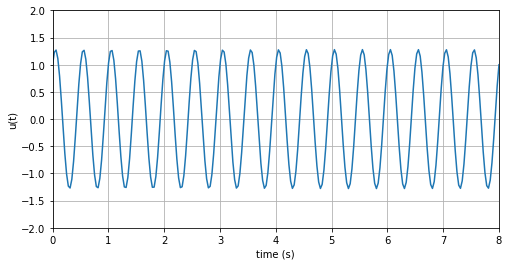

In [2]:
fn = 2.0                 # vibration frequency corresponding to 1 cycle per second
wn = 2*np.pi*fn          # conversion to rad/s
u0 = 1.                  # initial displacement of 1 meter
v0 = 10.                 # oscillation starts from rest (try changing this)
Td = 8.                  # time series duration (s)
fs = 32.                 # sampling rate (Hz)

t  = np.linspace(0, Td, int(fs*Td))
u  = u0*np.cos(wn*t) + (v0/wn)*np.sin(wn*t)

plt.figure(1, figsize=(8, 4), clear=True)
plt.plot(t, u)

plt.xlim( 0, Td);  plt.xlabel('time (s)') 
plt.ylim(-2,  2);  plt.ylabel('u(t)') 

plt.grid(True) 


This is surely not an interesting result. Try changing the values for $u_0$ and $v_0$ to
see what happens. Indeed, the solution above can also be given in the form:

$$ u(t) = u_{\rm max} \sin ( \omega_{\rm n}t + \theta ) $$

with:

\begin{align*}
 u_{\rm max} &= \sqrt{u_0^2 + \left(\frac{v_0}{\omega_{\rm n}}\right)^2} \\ \\
 \theta      &= \arctan \left( \frac{u_0 \omega_{\rm n}}{v_0} \right)
\end{align*}

The most important observation so far is the natural vibration frequency, that holds a
sort of universal law for mechanical vibrations:

$$ \omega_{\rm n} = \sqrt{\frac{k}{m}} $$ 

Hence, the larger the system stiffness the higher the frequency, while the
larger the system mass the lower the frequency, and vice-versa.
This special frequency can be also obtained by energy conservation, 
if one recognizes that there are two kinds of energy present in the system:

1. Potential elastic energy: $$V = k u^2(t)/2$$
2. Kinectic energy: $$T = m \dot{u}^2(t)/2$$

Assuming that if the maximum displacement of the system is $u_{\rm max}$, then the 
maximum velocity will be $\omega_{\rm n} u_{\rm max}$. 
When the displacement attains its maximum the potential energy is maximum
and the kinectic energy is minimun, and vice-versa. By energy conservation:

$$ \frac{k \; u_{\rm max}^2}{2} = \frac{m \; \omega_{\rm n}^2 \; u_{\rm max}^2}{2} $$

what leads to the equation for $\omega_{\rm n}$.

The natural frequency is also expressed in cycles per second, or _Hertz_, related to 
the frequency in radians per second with:

$$ f_{\rm n} =\frac{\omega_{\rm n}}{2 \pi} $$

Alternatively, the _natural period of vibration_:

$$ T_{\rm n} = \frac{1}{f_{\rm n}} = \frac{2 \pi } {\omega_{\rm n}} $$

can be used. These relations are illustrated in the figure below. <br>  <br>

<img src="images/frequency_relations.jpg" alt="Frequency relations" width="640px"/> <br>



## 2. Energy dissipation <a name="section_2"></a> 

Besides the potential and kinectic energy, there is always some energy dissipation 
mechanism taking place during the system vibration (otherwise a perpetual motion 
would be possible). 
The most common causes for this dissipation are:

1. Material internal hysteresis, <br>

<img src="images/hysteresis.png" alt="Hysteresis" width="300px"/> <br>

2. Shear deformation of embedding fluid, <br>

<img src="images/karman.jpg" alt="Viscosity" width="300px"/> <br>

3. Friction at supports or connections, <br>

<img src="images/friction.png" alt="Friction" width="640px"/>  <br>

among others. 

Each one of these phenomena must be properly modelled to enter the
equilibrium equation, but the most common approach is to use the
so-called _newtonian_ or _viscous_ damping model for the
dissipative force, $c \dot{u}$, where $c$ is the viscous damping constant.
The great advantage of this model is that the equilibrium equation preserves
its linearity and solution easiness, but one must keep in mind that it is
_only a model_ and the definition of constant $c$ may be quite challenging.

Most commonly the damping constant is presented as a _ratio to critical 
damping_, $\zeta$, defined as:

$$ \zeta = \frac{c}{2 m \omega_{\rm n}} $$

which is non-dimensional and for this reason more easily quantified.
It can be shown that $\zeta = 1$ is the smallest damping prenventing the 
system from having a single oscillation (one can have an idea of this 
condition by releasing a pendulum under water).

The Chapter 9 of the Brazilian Code _NBR6123-Forças devidas o vento nas
edificações_ brings a table (_Tabela 2_) of suggested values for $\zeta$ 
according to the type of structural system undergoing wind induced vibration:

|  Structure type                                           | $\zeta$  | 
| :---                                                      |   :---:  | 
| Reinforced concrete buildings without stiffning walls     |   0.020  | 
| Reinforced concrete buildings with stiffning walls        |   0.015  | 
| Reinforced concrete towers and chimneys, tappered         |   0.015  | 
| Reinforced concrete towers and chimneys, constant section |   0.010  | 
| Moment resisting steel buildings with welded connections  |   0.010  | 
| Steel towers and chimneys, constant section               |   0.008  |
| Timber structures                                         |   0.030  |

It can be observed that for Civil Engineering the range of values are
not too wide, and a typical value $\zeta = 0.01 = 1\%$ is usually assumed
when no further information is available.

In the next section it will be shown that despite of all uncertainty about
energy dissipation, it is of utmost importance for the safety and good
performance of mechanical systems.


## 3. Free vibration of damped _sdof_ systems <a name="section_3"></a> 

Assuming now the viscous model for energy dissipation gives the free vibration equilibrium:

$$ m \ddot{u} + c \dot{u} + k u = 0$$

Applying Laplace transform over this equation gives:

$$ \mathscr{L}\left\{ m \ddot{u} + c \dot{u} + k u \right\} = 
    m \left[ -s u(0) - \dot{u}(0) + s^2 \bar{u}(s) \right] + 
    c \left[ -u(0) + s \bar{u}(s) \right] +
    k \bar{u}(s) = 0 $$

Solving for $\bar{u}(s)$ results in:

$$ \bar{u}(s) =  
   \left[\frac{(s + \eta)}{(s + \eta)^2 + \omega_{\rm D}^2}\right] u_0 + 
   \left[\frac{\omega_{\rm D}}{(s + \eta)^2 + \omega_{\rm D}^2}\right] 
   \left(\frac{v_0 + \eta u_0}{\omega_{\rm D}} \right) $$

where we have additionally defined:

\begin{align*}
\omega_{\rm D}^2 &= \omega_{\rm n}^2 - \eta^2 = \omega_{\rm n}^2 \left( 1 - \zeta^2 \right ) \\ \\
\eta &= \frac{c}{2m} = \zeta \omega_{\rm n}
\end{align*}

The inverse transform can be obtained with the well known sine and cosine 
transforms and the translation theorem in frequency domain:

$$ u(t) = e^{- \zeta \omega_{\rm n} t}
   \left[ u_0 \cos \omega_{\rm D}t + \left( \frac{v_0 + \zeta \omega_{\rm n} u_0}
   {\omega_{\rm D}} \right) \sin \omega_{\rm D}t  \right] $$

It can be seen that the free vibration now occurs at the _natural damped 
vibration frequency_ $\omega_{\rm D}$, and the movement amplitude depends on 
the initial displacement and initial velocity. 

Although the natural frequency has changed, by recalling that the damping 
ration $\zeta$ usually is in the order of 1% implies, for instance, that:

$$ \omega_{\rm D} = \omega_{\rm n} \sqrt{1 - 0.01^2} 
                    \approx 0.99995 \omega_{\rm n} \approx \omega_{\rm n}$$

what means that, beyond the whole uncertainty about the actual damping, 
for usual damping values the natural frequency change may be disregarded.

Let us take a look at the free vibration damped response
using the same time discretization from the previous example.


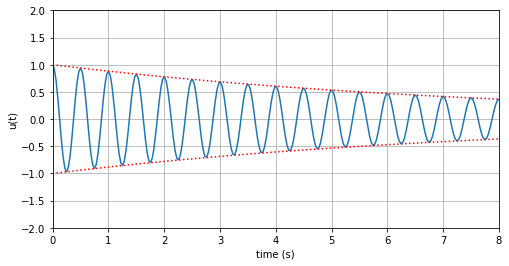

In [3]:
zt = 0.01                # damping ratio of 3% of the critical (try changing this)
u0 = 1.                  # initial displacement of 1 meter
v0 = 0.                  # oscillation starts from rest 

wD = wn*np.sqrt(1 - zt**2)
e  = np.exp(-zt*wn*t)
uD = e*(u0*np.cos(wD*t) + ((v0 + zt*wn*u0)/wD)*np.sin(wD*t))

plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(t, uD)
plt.plot(t, e, 'r:', t, -e, 'r:')

plt.xlim( 0, 8);  plt.xlabel('time (s)') 
plt.ylim(-2, 2);  plt.ylabel('u(t)') 

plt.grid(True) 


It can be observed that the exponential envelope causes the undamped response to have
its amplitude decreased along time. Try changing the damping ratio in the script above
to see how this affect the response (but it must always be within the range $0 < \zeta < 1$).


## 4. Damping ratio estimation <a name="section_4"></a> 

As we did for the undamped response, the damped response in free vibration can be put in
the form:

$$ u(t) = u_{\rm max} \left[ 
          e^{- \zeta \omega_{\rm n} t} \cos ( \omega_{\rm D}t - \theta ) \right]$$

with:

\begin{align*}
 u_{\rm max} &= \sqrt{u_0^2 + 
                \left( \frac{v_0 + \zeta \omega_{\rm n} u_0} {\omega_{\rm D}} \right) ^2} \\ \\
 \theta      &= \arctan \left( \frac{v_0 + \zeta \omega_{\rm n} u_0}{u_0 \omega_{\rm D}}\right)
\end{align*}

Now we calculate the amplitude ratio at two time instants where the cosine
function reaches its maximum, which are $N$ vibration cycles apart, what gives:

$$ \frac{u(t)}{u(t + N T_{\rm n})} = 
   \frac{\exp \left[ - \zeta \omega_{\rm n}  t                \right]}
        {\exp \left[ - \zeta \omega_{\rm n} (t + N T_{\rm n}) \right]} = 
         \exp \left( - \zeta \omega_{\rm n} N T_{\rm n}       \right)  =
         \exp \left( - 2 \pi \zeta N  \right) $$ 

<img src="images/zeta_estimation1.jpg" alt="zeta estimation" width="480px"/>  <br>

Making $u(t) = u_i$, $u(t + N T_{\rm n}) = u_{i+N}$, taking natural logarithms 
and isolating $\zeta$ finally gives:

$$ \zeta = \frac {\log (u_i \, / \, u_{i+N})}{2 \pi N} $$

This formula is exemplified in the figure below with the output of a real accelerometer.
It is important to emphasize that the estimator presented above is valid no matter
which kinemactic parameter is used for the amplitude ratio (displacement, velocity or
acceleration), for they are related by a constant that will cancel upon division.

<img src="images/zeta_estimation2.jpg" alt="zeta estimation" width="480px"/>  <br>

Applying the formula gives:

$$ \zeta = \frac{\ln (0.52 \, / \, 0.31)}{2 \pi \cdot 8} \approx 1\% $$

A usefull rule for estimating $\zeta$ without much effort is to count the number
of cycles necessary for the amplitude to be reduced to half. In this case:

$$ \zeta = \frac{\ln (2 \, / \, 1)}{2 \pi \,N} \approx \frac{1}{9N} $$

The ```MRPy``` module provides a more sophisticated tool for estimating all 
parameters of a free damped response function available as a time series. 
This is exemplifyed below using the same the $u(t)$ function from the previous example.


Amplitude:     0.89m  
Frequency:     2.00Hz 
Damping ratio: 1.00%  
Phase:         -0.09rad


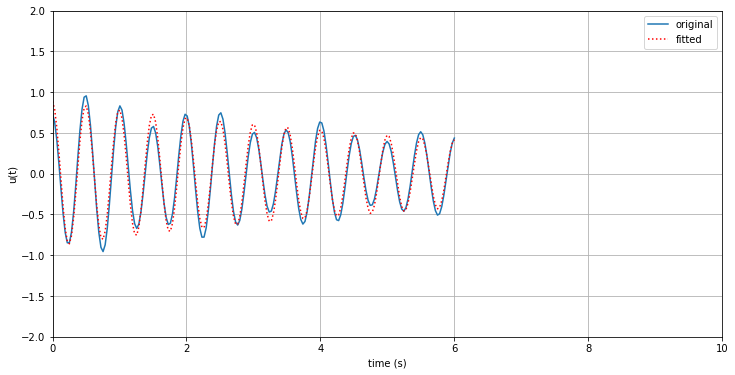

In [4]:
zt = 0.01                # damping ratio of 1% of the critical (try changing this)
u0 = 1.                  # initial displacement of 1 meter
v0 = 0.                  # oscillation starts from rest 

wD = wn*np.sqrt(1 - zt**2)
e  = np.exp(-zt*wn*t)
uD = e*(u0*np.cos(wD*t) + ((v0 + zt*wn*u0)/wD)*np.sin(wD*t) + 0.2*u0*np.cos(0.7*wD*t)) 

uD      = MRPy(uD, fs=fs)           # converting numpy to MRPy object
uD      = uD.extract((1/8, 7/8))

ufit, p = uD.fit_decay()            # calls fit_decay() method
t       = uD.t_axis()               # prepare time axis for plotting

plt.figure(3, figsize=(12, 6), clear=True)
plt.plot(t, uD[0])
plt.plot(t, ufit[0], 'r:')
plt.legend(('original','fitted'))

plt.xlim( 0, 10);  plt.xlabel('time (s)') 
plt.ylim(-2,  2);  plt.ylabel('u(t)') 

plt.grid(True) 

# Print out fitted parameters

print('Amplitude:     {0:4.2f}m  '.format(p[0,0]))
print('Frequency:     {0:4.2f}Hz '.format(p[0,1]))
print('Damping ratio: {0:4.2f}%  '.format(p[0,2]*100))
print('Phase:         {0:4.2f}rad'.format(p[0,3]))


The fitting result is usually not so accurate when the original function comes from
real measurements. In some cases the fitting algorithm (which uses ```scipy``` module)
may even fail in presenting any usefull result. 


## 5. Assignments <a name="section_5"></a> 

1. Fazer um registro com o celular de uma superfície em vibração livre (lenta)
2. Importar para dentro de um Jupyter notebook e analisar:
   (a) Razão de amortecimento por decremento logarítmico.
   (b) Frequência e razão de amortecimento por ``MRPy.fit_decay()``.
3. Relatório com descrição do objeto, gráficos e resultados (nome do arquivo     T2_xxxxxxxx.ipynb).

Prazo: 18 de maio de 2020.
